Student's Name and Email Address

Boise State University, Department of Chemistry and Biochemistry

## CHEM 324: PChem Lab
# Worksheet 1: Python Programming and Data Analysis

For the following tasks you will be using the main Python modules discussed in the first notebooks of the course and reported in the following import statement

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import stats
from sklearn.linear_model import LinearRegression
from scipy.stats import sem, norm, t

In [2]:
base_path = '/Users/School/PycharmProjects/PChem-Lab/'
my_path = 'Test_Files/'  
path = base_path + my_path

You should now specify the local path to the folder containing your data files. Remember to put a '/' at the end of the path and double check that the path looks right

In [3]:
base_path = '/Users/School/PycharmProjects/PChem-Lab/'
my_path = 'Test_Files/'  
path = base_path + my_path


## Task 1: Reporting Measures and Errors

In the following array you are given a set of measures of the temperature of a sample (in Kelvin), taken at constant conditions and regular time intervals. We want to use the collection of measures to report our best estimate of the temperature of our experiment, together with its associated error, expressed as the 95% confidence interval.  

In [4]:
measures = np.array([296.74540119, 302.50714306, 300.31993942, 298.98658484, 294.56018640,
 294.55994520,  293.58083612, 301.66176146, 299.01115012, 300.08072578,
 293.20584494, 302.69909852, 301.32442641, 295.12339111, 294.81824967,
 294.83404510,  296.04242243, 298.24756432, 297.31945019, 295.91229140])

Task 1.1: In the following cell write your best estimate of the temperature of the sample. You can use Python to perform the calculation and save it in a variable called estimate, or you can write directly the calculation inside the format. Make sure you format your number according to how many digits are actually significant. NOTE: You may want to adjut the number of significant figures after you have computed the confidence interval (next step). 

In [5]:

mean_temp = np.mean(measures)

print(f"Mean Temperature: {mean_temp:.1f} K")



Mean Temperature: 297.6 K


Task 1.2: In the following cell write the error associated with your estimate, defined as the 95% confidence interval. You can use Python to perform the calculation and save it in a variable called error, or you can write directly the calculation inside the format. Make sure you format your number according to how many digits are actually relevant (usually only the first one). 

Before performing the calculation, you may want to think about which statistical distribution you want to use: the normal distribution or the student's t distributon?

In [6]:


confidence = 0.95  # 95% confidence interval
degrees_of_freedom = len(measures) - 1  # Degrees of freedom
error_ci95 = sem(measures) * t.ppf((1 + confidence) / 2, degrees_of_freedom)

print(f"The 95% confidence interval for our estimate is \u00B1 {error_ci95:.1f} K")


The 95% confidence interval for our estimate is ± 1.4 K


In [7]:


# Calculate the mean
estimate = np.average(measures)

# Calculate the 95% confidence interval
confidence = 0.95
degrees_of_freedom = len(measures) - 1
error_ci95 = sem(measures) * t.ppf((1 + confidence) / 2, degrees_of_freedom)

# Round the error to the first significant digit; log based
error_rounded = round(error_ci95, -int(np.floor(np.log10(abs(error_ci95)))))

# If the first significant digit is 1, round to the second significant digit
if error_rounded == 1.0 or error_rounded == -1.0:  
    error_rounded = round(error_ci95, -int(np.floor(np.log10(abs(error_ci95)))) + 1)

decimal_places = len(str(error_rounded).split('.')[1]) if '.' in str(error_rounded) else 0

# Format and print the result
print(f"The temperature of the sample is {estimate:.{decimal_places}f} ± {error_rounded:.{decimal_places}f} K")

The temperature of the sample is 297.6 ± 1.4 K


Task 1.3: How different are the results using the Student's t instead of the normal distribution? 

In [8]:
# Calculate the mean and standard deviation
mean = np.mean(measures)
std_dev = np.std(measures, ddof=1)  # ddof=1 for sample standard deviation

# Calculate the standard error
std_err = std_dev / np.sqrt(len(measures))


alpha = 0.05  
z_critical = norm.ppf(1 - alpha / 2)  
margin_of_error_norm = z_critical * std_err



print(f"The best estimate of the temperature of the sample is {estimate: .1f} K")
error_ci95 = error_rounded 
print(f"The 95% confidence interval for our estimate is ± {error_ci95: .1f} K")



The best estimate of the temperature of the sample is  297.6 K
The 95% confidence interval for our estimate is ±  1.4 K


# Due to rounding, no difference between Student T and Normal Dist

Task 1.4: Your labmate has been lazy and, instead of 20 values, they decided to measure only 4. What is your estimate and confidence interval in this case?

In [9]:
lazy_measures = np.array([296.74540119, 302.50714306, 300.31993942, 298.98658484])

In [10]:

# Calculate the mean
estimate = np.average(lazy_measures)

# Calculate the 95% confidence interval
confidence = 0.95
degrees_of_freedom = len(lazy_measures) - 1
error_ci95 = sem(lazy_measures) * t.ppf((1 + confidence) / 2, degrees_of_freedom)

# Round the error to the first significant digit; log based
error_rounded = round(error_ci95, -int(np.floor(np.log10(abs(error_ci95)))))

# If the first significant digit is 1, round to the second significant digit
if error_rounded == 1.0 or error_rounded == -1.0: 
    error_rounded = round(error_ci95, -int(np.floor(np.log10(abs(error_ci95)))) + 1)

# Determine the number of decimal places for the error
decimal_places = len(str(error_rounded).split('.')[1]) if '.' in str(error_rounded) else 0

# Format and print the result
print(f"The temperature of the sample is {estimate: .0f} ± {error_rounded: .0f} K")


The temperature of the sample is  300 ±  4 K


## Task 2: Reading and Checking a Challenging CSV File

For the second task, you will need to find a way to read the file `ta.csv`. You can find this file on [GitHub](https://github.com/BoiseState-Chem/Programming/blob/main/Test_Files/ta.csv) or in the [Canvas page](https://boisestatecanvas.instructure.com/courses/27670/files/14071187?wrap=1) of the assignment. This is a csv file, but it has some peculiar issues:

* it uses semicolon (`;`) as separator
* it uses a colon (`,`) instead of a dot (`.`) for the decimals notation

Task 2.1: Use the capabilities of `Pandas.read_csv()` function, to read this file into a `DataFrame`. 

In [11]:
file = 'ta.csv'
data = pd.read_csv(path+file, sep='\\s+',decimal=',', skiprows= 1, skipfooter=1, engine = "python")
data


,Laser-Delay[ns],TA1[mOD],TA2[mOD],TA3[mOD],TA4[mOD],TA5[mOD]
0,-400,-0.363284,-0.101139,-0.428288,0.043098,-0.103998
1,-390,-0.464574,-0.142894,-0.294602,-0.199885,-0.323079
2,-380,-0.270030,-0.316764,-0.358936,-0.440334,-0.254724
3,-370,-0.245370,-0.012989,-0.366877,-0.389370,-0.210857
4,-360,-0.260838,-0.181731,-0.027994,0.086638,-0.208827
...,...,...,...,...,...,...
536,4960,1.141909,0.725613,0.598935,0.697969,0.528366
537,4970,0.398080,0.575600,0.401757,0.683005,0.883877
538,4980,0.642711,0.365095,0.542756,0.340545,0.669134
539,4990,0.478086,0.570831,0.624570,0.406449,0.296095


Task 2.2: Answer the following questions using `DataFrame` functionalities. Make sure to show your Python work, leaving the commands that you used in the notebook or referring to them in your answers.

* How many rows and columns of data are in the file?   

* What is the last recorded value of the laser delay time? 

* What is the first recorded value of the transient absorption in run 5 (i.e., in the column labelled TA5)?

* What is the peak value of the transient absorption in run 2 (i.e., the maximum value)?

In [12]:
len(data)
len(data.columns)
first_recorded_value = data.iloc[0,0]
last_recorded_value = data.iloc[540,3] 
peak_run_4 = np.max(data.iloc[:, 4])

print(f"Data has {len(data)} rows and {len(data.columns)} columns.")
print(f"First recorded value is {first_recorded_value}.")
print(f"Last recorded value is {last_recorded_value}.")
print(f"Peak run 4 is {peak_run_4}.")
      



Data has 541 rows and 6 columns.
First recorded value is -400.
Last recorded value is 0.649553.
Peak run 4 is 42.863927.


Task 2.3: Make a plot that shows at least two of the transient absorption curves as a function of the laser delay. 

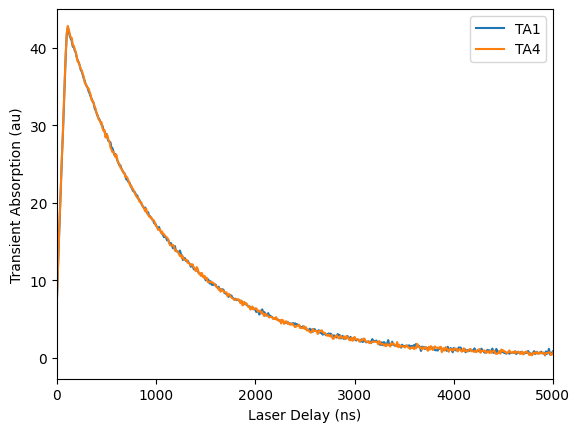

In [13]:
plt.plot(data["Laser-Delay[ns]"], data["TA1[mOD]"], label = 'TA1')
plt.plot(data["Laser-Delay[ns]"], data["TA4[mOD]"], label = 'TA4')
plt.xlim(0,5000)
plt.xlabel('Laser Delay (ns)')
plt.ylabel('Transient Absorption (au)')
plt.legend()
plt.show()



## Task 3: Math on Datasets

For all the tasks that follow you wil be working with a dataset created by your instructor, named `protein.csv`. You can find this file on [GitHub](https://github.com/BoiseState-Chem/Programming/blob/main/Test_Files/protein.csv) or in the [Canvas page](https://boisestatecanvas.instructure.com/courses/27670/files/14071185?wrap=1) of the assignment. The data file contains more than 700 rows of data related to the atoms of a small protein (an insulin mutant, entry 1A7F in the Protein Data Bank). For each atom the file report the element label (first column), some properties that are related to how close to the surface of the protein the atom is, as well as the cartesian coordinates (X,Y,Z, in the last three columns) of that atom, as obtained from crystallographic data, the atomic mass of the atom (MASS), and its distance from the center of mass of the protein (R_vs_COM). Units for all the reported columns can be assumed to be atomic units (a.u.). 

Use `Pandas` to load the file into a `DataFrame`.

In [14]:
file = 'protein.csv'
protein = pd.read_csv(path+file)

Task 3.1: Answer the following questions related to the dataset. Make sure to show your Python work, leaving the commands that you used in the notebook or referring to them in your answers.

In [15]:
atoms = len(protein)
nitrogen = len(protein[protein['ELEMENT']=='N'])
total_mass = np.sum(protein['MASS'])


# How many atoms are in the protein?
print(f"The file contains {atoms} atoms")
# How many of these are nitrogen atoms?
print(f"The protein has {nitrogen} N atoms")
# What is the total mass of the protein?
print(f"The protein has a mass of {total_mass} atomic units")


The file contains 753 atoms
The protein has 64 N atoms
The protein has a mass of 5573.0 atomic units


Task 3.2: From the knowledge of the positions of the atoms, $\vec{R}_i$, and their masses, $m_i$, we can compute the coordinates of the center of mass of the protein $\vec{r}_{com}=\frac{1}{M_{tot}}\sum{m_i\vec{R}_i}$, where $M_{tot}$ is the total mass.

While you can solve this task using `for` loops, try doing the math directly on the columns of the `DataFrame`. You may want to write the vector that you need to compute in terms of its three components:

$$x_{cm}=\frac{1}{M_{tot}}\sum{m_i{X}_i}$$
$$y_{cm}=\frac{1}{M_{tot}}\sum{m_i{Y}_i}$$
$$z_{cm}=\frac{1}{M_{tot}}\sum{m_i{Z}_i}$$

where $X_i$, $Y_i$, and $Z_i$ are the coordinates of the atoms and correspond to the 'X', 'Y', 'Z' columns of the `DataFrame`. NOTE: you can sum over all the values in a colum, with the `np.sum()` function or with the `df['Column-Name'].sum()` method. 

In [16]:
xcm = 1/total_mass*(np.sum(protein['MASS']*protein['X']))
ycm = 1/total_mass*(np.sum(protein['MASS']*protein['Y']))
zcm = 1/total_mass*(np.sum(protein['MASS']*protein['Z']))
print(f"The coordinates of the center of mass of the protein are {xcm} {ycm} {zcm}")

The coordinates of the center of mass of the protein are -0.35241485734792766 -0.45024062443926094 0.43055176745020607


## Task 4: Linear Regression

Still working on the data from the `protein.csv` file, extract the values corresponding to the VOL_CONT_20.0 and R_vs_COM columns. 

Task 4.1: Characterize the frequency distribution of these two data sets. You can do this by making histogram plots and by looking at their means and standard deviations.

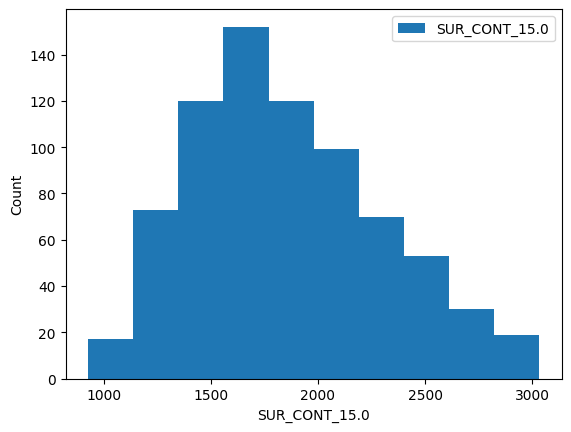

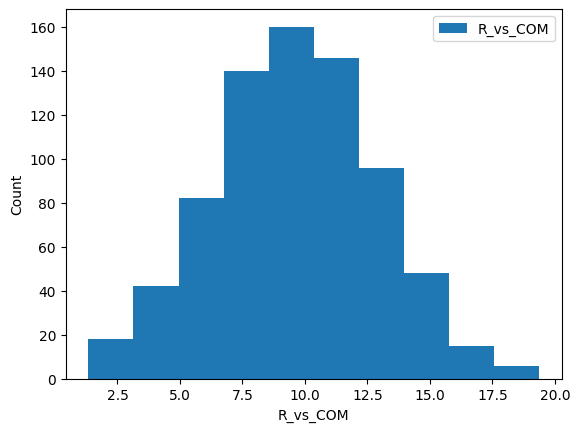

SUR_CONT_15.0: Mean = 1859.57, Standard Deviation = 438.69
R_vs_COM: Mean = 9.63, Standard Deviation = 3.24


In [17]:
sur_cont_data = protein['SUR_CONT_15.0'].values
r_vs_com_data = protein['R_vs_COM'].values
plt.hist(sur_cont_data, label='SUR_CONT_15.0')
plt.xlabel('SUR_CONT_15.0')
plt.ylabel('Count')
plt.legend()
plt.show()
plt.hist(r_vs_com_data, label='R_vs_COM')
plt.xlabel('R_vs_COM')
plt.ylabel('Count') 
plt.legend()
plt.show()

sur_cont_mean = np.mean(protein['SUR_CONT_15.0'])
sur_cont_std = np.std(protein['SUR_CONT_15.0'])
r_vs_com_mean = np.mean(protein['R_vs_COM'])
r_vs_com_std = np.std(protein['R_vs_COM'])

print(f"SUR_CONT_15.0: Mean = {sur_cont_mean:.2f}, Standard Deviation = {sur_cont_std:.2f}")
print(f"R_vs_COM: Mean = {r_vs_com_mean:.2f}, Standard Deviation = {r_vs_com_std:.2f}")



Task 4.2: Check if there is any relation between the two variables above. You can do this with a scatter plot.

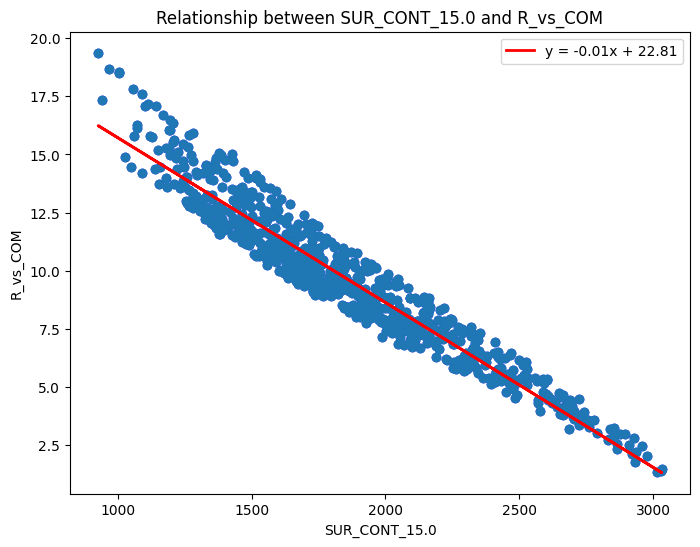

In [18]:
x = protein[['SUR_CONT_15.0']].values  
y = protein['R_vs_COM'].values.reshape(-1, 1)
model = LinearRegression()
model.fit(x, y)
# Predictions for regression line
y_pred = model.predict(x)

# Plot scatter plot and regression line
# Extract slope (m) and intercept (b)
m = model.coef_[0][0]  # Slope
b = model.intercept_[0]  # Intercept

# Create figure
plt.figure(figsize=(8, 6))

# Scatter plot for actual data
plt.scatter(x, y, color='blue')

# Plot regression line with equation in legend
equation_text = f"y = {m:.2f}x + {b:.2f}"  # Format regression equation
plt.plot(x, y_pred, color='red', linewidth=2, label=equation_text)

plt.xlabel('SUR_CONT_15.0')
plt.ylabel('R_vs_COM')
plt.title('Relationship between SUR_CONT_15.0 and R_vs_COM')
plt.scatter(x, y)
plt.legend()

There is a negative correlation between R_vs_COM and SUR_CONT_15.0

Feel free to comment on what is shown in the plot here. 

Task 4.3: Can we use the selected feature (VOL_CONT_20.0) to predict the distance of the atom from the center of mass of the protein (R_vs_COM)? Use a linear regression algorithm from `Sklearn` to perform a fit of a linear model. Plot the fit together with the data 

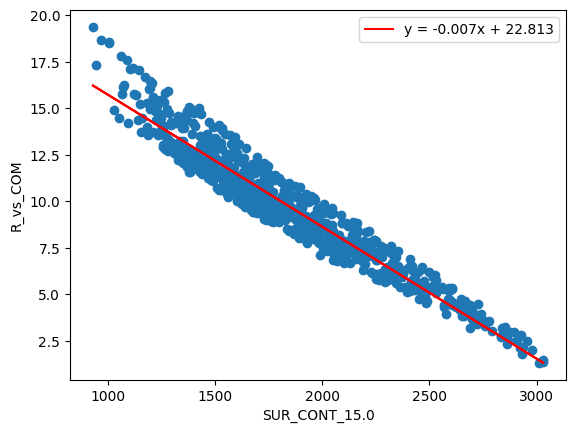

The linear fit has a slope of -0.007089719560518869 and an intercept of 22.812625237331957


In [19]:
lr = LinearRegression()
lr.fit(x, y)
plt.scatter(x, y)
m = float(lr.coef_[0][0])
b = float(lr.intercept_[0])
plt.plot(x, lr.predict(x), color='red', label=f"y = {m:.3f}x + {b:.3f}")
plt.xlabel('SUR_CONT_15.0')
plt.ylabel('R_vs_COM')
plt.legend()
plt.show()
print(f'The linear fit has a slope of {m} and an intercept of {b}')


Task 4.4: How good is your fit? Compute the fit's correlation score.

In [20]:
R2=lr.score(x,y)
print(f'The correlation score is {R2}')

The correlation score is 0.9228838222632761


Add your comments on the results here.

R^2 = .922 is a relatively strong correlation

## Bonus Task

1. Out of all the variables named SUR_CONT_... and VOL_CONT_..., which one is the best to predict R_vs_COM using a linear model?
2. Can you improve on the prediction of R_vs_COM using more than one variable? 

In [21]:

sur_cont_cols = [col for col in protein.columns if 'SUR_CONT' in col]
vol_cont_cols = [col for col in protein.columns if 'VOL_CONT' in col]
predictor_cols = sur_cont_cols + vol_cont_cols

# Store R-squared values for each predictor
r2_scores = {}

# Loop through each predictor column
for predictor in predictor_cols:
    x = protein[[predictor]].values
    y = protein['R_vs_COM'].values.reshape(-1, 1)

    lr = LinearRegression()
    lr.fit(x, y)
    r2_scores[predictor] = lr.score(x, y)

best_predictor = max(r2_scores, key=r2_scores.get)
best_r2 = r2_scores[best_predictor]

print(f"Best predictor: {best_predictor}, R-squared: {best_r2:.3f}")

# sort descending order and select top two
top_predictors = sorted(r2_scores, key=r2_scores.get, reverse=True)[:2]  
                                                   
x = protein[top_predictors].values  
y = protein['R_vs_COM'].values

lr = LinearRegression()
lr.fit(x, y)
r2_multiple = lr.score(x, y)

print(f"R-squared with multiple predictors: {r2_multiple:.3f}")

Best predictor: VOL_CONT_15.0, R-squared: 0.978
R-squared with multiple predictors: 0.982
